# Downloading Data with `Fido`

In this session we will be using the `Fido` interface in SunPy to download some EUV data which we will use in the next session. `Fido` has access to a wide variety of different clients, instruments and data sources, and SunPy allows you to create arbitarily complex queries to search and then download the data.

## Useful Links

1. [Acquiring Data with SunPy](http://docs.sunpy.org/en/stable/guide/acquiring_data/index.html)
1. [The VSO](http://virtualsolar.org/)
1. [MapSequence Documentation](http://docs.sunpy.org/en/stable/guide/data_types/maps.html#mapsequences)

## The `sunpy.net` Module

SunPy's `net` submodule includes useful functionality for querying and downloading data from various sources and clients. The most important things included in this submodule are `Fido`, SunPy's unified downloader interface, and `attrs`, which is used for defining attributes of data such as `Time` or `Instrument`. For this session, we'll import both of these:

In [1]:
from sunpy.net import Fido, attrs as a
import astropy.units as u

Let's do a simple search for a day's worth of AIA data (don't worry, it wont download it all):

In [3]:
results = Fido.search(a.Time("2016/02/03", "2016/02/04"),
                      a.Instrument('AIA'))

In [8]:
results[0,10:20]

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2016-02-03 09:19:25,2016-02-03 09:29:14,SDO,AIA,FULLDISK,335.0 .. 335.0
2016-02-03 19:59:25,2016-02-03 20:09:14,SDO,AIA,FULLDISK,335.0 .. 335.0
2016-02-03 06:39:34,2016-02-03 06:49:23,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-02-03 18:29:24,2016-02-03 18:39:13,SDO,AIA,FULLDISK,94.0 .. 94.0
2016-02-03 22:19:24,2016-02-03 22:29:13,SDO,AIA,FULLDISK,94.0 .. 94.0
2016-02-03 17:09:31,2016-02-03 17:19:20,SDO,AIA,FULLDISK,131.0 .. 131.0
2016-02-03 07:39:25,2016-02-03 07:49:14,SDO,AIA,FULLDISK,335.0 .. 335.0
2016-02-03 22:59:41,2016-02-03 23:09:18,SDO,AIA,FULLDISK,1700.0 .. 1700.0


This is a little too much data, so let's restrict it to a single wavelength and ask for a lower cadence:

In [10]:
results = Fido.search(a.Time("2016/03/02", "2016/03/03"), 
                      a.Instrument('AIA'),
                      a.Wavelength(171*u.AA, 17.1*u.nm), 
                      a.Sample(2*u.h))

In [15]:
results

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2016-03-02 22:00:10,2016-03-02 22:00:11,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-03-02 06:00:10,2016-03-02 06:00:11,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-03-02 16:00:10,2016-03-02 16:00:11,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-03-02 08:00:10,2016-03-02 08:00:11,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-03-02 02:00:10,2016-03-02 02:00:11,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-03-02 18:00:10,2016-03-02 18:00:11,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-03-02 20:00:10,2016-03-02 20:00:11,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-03-02 10:00:10,2016-03-02 10:00:11,SDO,AIA,FULLDISK,171.0 .. 171.0


In [27]:
files = Fido.fetch(results)

In [19]:
files.errors
files = Fido.fetch(files)

In [ ]:
!conda install zeep bs4 drms
!conda install sunpy[all]

In [22]:
from sunpy.map import Map

mymap = Map(files[0])
mymap

SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 3
Detector:		 AIA
Measurement:		 171.0 Angstrom
Wavelength:		 171.0 Angstrom
Observation Date:	 2016-03-02 22:00:10
Exposure Time:		 1.999572 s
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.599489 0.599489] arcsec / pix
Reference Pixel:	 [2055.030029 2047.339966] pix
Reference Coord:	 [0. 0.] arcsec
array([[ 0,  0,  2, ...,  0, -1, -2],
       [ 1, -1, -1, ...,  2,  1, -1],
       [ 2, -1, -2, ...,  0,  0, -1],
       ...,
       [-1,  0, -1, ..., -1, -1,  0],
       [-2,  0,  1, ..., -3, -1,  1],
       [ 1, -1, -1, ..., -1,  2,  0]], dtype=int16)

## SunPy MapSequence

A quick aside into plotting sequences of images with SunPy. We will load these files we just downloaded into a SunPy MapSequence and animate them. (Note is a little more responsive outside of the notebook.)

In [23]:
%matplotlib notebook
import sunpy.map

In [24]:
mapsequence = sunpy.map.Map(files, sequence=True)

<IPython.core.display.Javascript object>


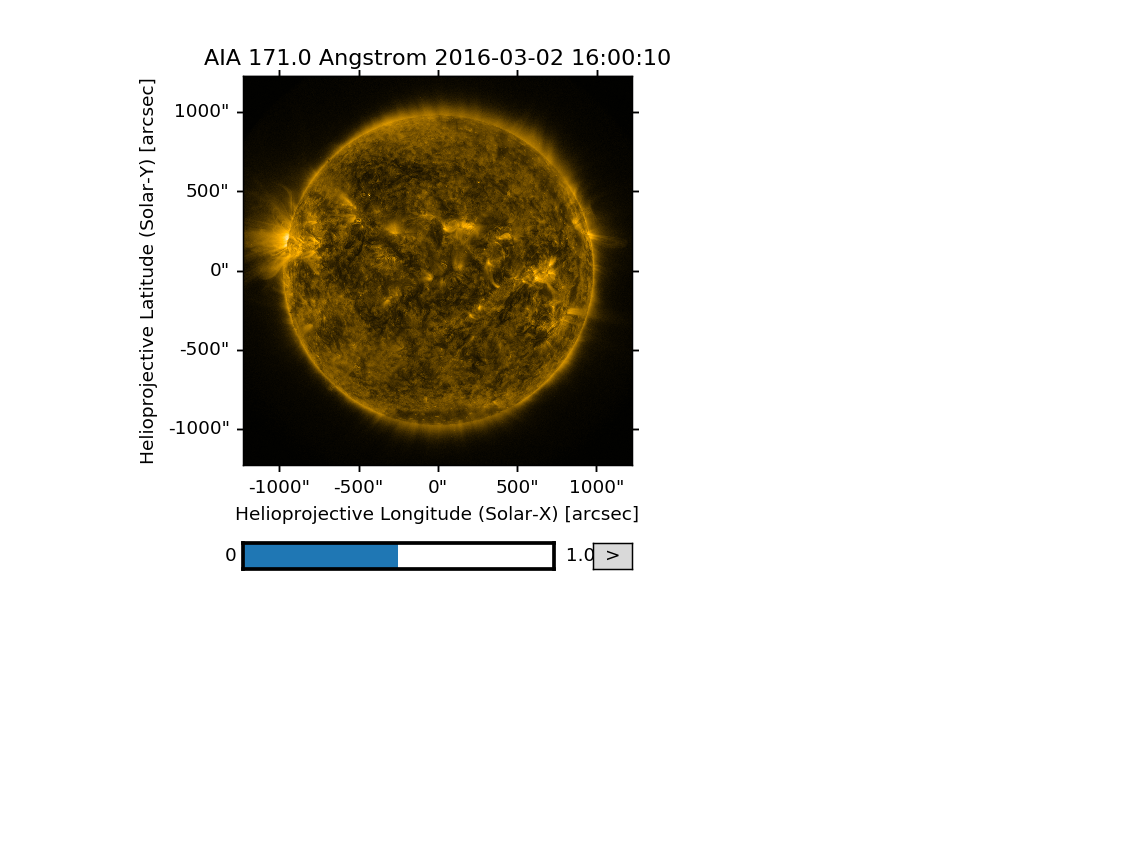

In [26]:
mapsequence.peek()

## More Complex Searching

In this example we will use the logical operators to combine attributes into a complex multi-instrument query.

You can use the `&` and operator or the `|` or operator to make queries. In the previous example all arguments to `vc.query` had the and operator applied, we performed a search where the Instrument *and* the Wavelength *and* the time matched. We could have done this explicitly like this:

In [28]:
mysearch = a.Time("2016/02/03", "2016/02/03T00:10:00") & a.Instrument('AIA')
Fido.search(mysearch)

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2016-02-03 00:00:00,2016-02-03 00:00:01,SDO,AIA,FULLDISK,94.0 .. 94.0
2016-02-03 00:00:01,2016-02-03 00:00:02,SDO,AIA,FULLDISK,335.0 .. 335.0
2016-02-03 00:00:05,2016-02-03 00:00:06,SDO,AIA,FULLDISK,193.0 .. 193.0
2016-02-03 00:00:06,2016-02-03 00:00:07,SDO,AIA,FULLDISK,304.0 .. 304.0
2016-02-03 00:00:06,2016-02-03 00:00:07,SDO,AIA,FULLDISK,4500.0 .. 4500.0
2016-02-03 00:00:07,2016-02-03 00:00:08,SDO,AIA,FULLDISK,131.0 .. 131.0
2016-02-03 00:00:10,2016-02-03 00:00:11,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-02-03 00:00:10,2016-02-03 00:00:11,SDO,AIA,FULLDISK,211.0 .. 211.0


If we want to do the same query but for two seperate wavelengths we can use the `|` or operator:

In [29]:
instrument = a.Time("2016/02/03", "2016/02/03T00:10:00") & a.Instrument('AIA')
wavelength = a.Wavelength(17.1*u.nm, 17.1*u.nm) | a.Wavelength(304*u.AA, 304*u.AA)
mysearch = instrument & wavelength

In [30]:
Fido.search(mysearch)

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2016-02-03 00:00:10,2016-02-03 00:00:11,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-02-03 00:00:22,2016-02-03 00:00:23,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-02-03 00:00:34,2016-02-03 00:00:35,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-02-03 00:00:46,2016-02-03 00:00:47,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-02-03 00:00:58,2016-02-03 00:00:59,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-02-03 00:01:10,2016-02-03 00:01:11,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-02-03 00:01:22,2016-02-03 00:01:23,SDO,AIA,FULLDISK,171.0 .. 171.0
2016-02-03 00:01:34,2016-02-03 00:01:35,SDO,AIA,FULLDISK,171.0 .. 171.0


### Multiple Instruments

In this example we want to download one image from STEREO A EUVI and one image from SDO AIA as close together in time as we can. To do this we will define a search for the AIA image and a search for the EUVI image then 'or' them together.

In [31]:
stereo = (a.vso.Source('STEREO_A') &
          a.Instrument('EUVI') &
          a.Time('2011-01-01', '2011-01-01T00:10:00'))

aia = (a.Instrument('AIA') &
       a.Sample(24 * u.hour) &
       a.Time('2011-01-01', '2011-01-02'))

wave = a.Wavelength(30 * u.nm, 31 * u.nm)

In [32]:
results = Fido.search(aia | stereo, wave)
results

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2011-01-01 00:00:08,2011-01-01 00:00:09,SDO,AIA,FULLDISK,304.0 .. 304.0
Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str8,str6,str8,float64
2011-01-01 00:06:15,2011-01-01 00:06:19,STEREO_A,SECCHI,FULLDISK,304.0 .. 304.0


In [33]:
files = Fido.fetch(results)

In [34]:
files

['/home/drew/sunpy/data/secchi_l0_a_img_euvi_20110101_20110101_000615_n4eua.fts', '/home/drew/sunpy/data/aia_lev1_304a_2011_01_01t00_00_08_12z_image_lev1.fits']